**CNN (MNIST DIGIT DATASET)**


Insert Code wherever represented with "#***************#"

# Importing Libraries

In [1]:
import keras
import cv2
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

# Data Preprocessing

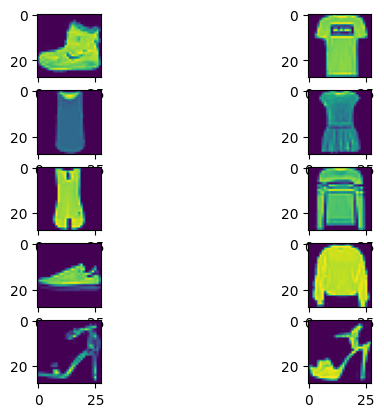

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)

y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(x_train[i])

# Build CNN Model

In [3]:
x_train /= 255
x_test /=255

'''
Define batch size of 64 , 
No of classes (interpret from data)
Train for 5 epochs

'''
batch_size = 64
num_classes = 10
epochs = 5

def build_model(optimizer):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(62,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
    model.summary
    return model

#**** call build model with RMSprop and SGDOptimizer Optimizer ****

optimizers = ['rmsprop','sgd']
accuracy = []
validation = []

for i in optimizers:
    print(f"Traiining with {i} optimizer")
    model = build_model(i)
    hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))
    keras.models.save_model(model,f"fasion_{i}_model.keras",save_format="keras")
    y1 = hist.history['accuracy']
    y2 = hist.history['val_accuracy']
    accuracy.append(y1)
    validation.append(y2)

Traiining with rmsprop optimizer


E:\INSTALLATIONS\MINICONDA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.7301 - loss: 0.7531 - val_accuracy: 0.8602 - val_loss: 0.3804
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8625 - loss: 0.3833 - val_accuracy: 0.8776 - val_loss: 0.3363
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.8832 - loss: 0.3292 - val_accuracy: 0.8825 - val_loss: 0.3136
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8895 - loss: 0.3023 - val_accuracy: 0.8888 - val_loss: 0.3076
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8965 - loss: 0.2862 - val_accuracy: 0.8925 - val_loss: 0.2938


Traiining with sgd optimizer
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.3581 - loss: 1.7608 - val_accuracy: 0.7360 - val_loss: 0.7277
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.7048 - loss: 0.7887 - val_accuracy: 0.7690 - val_loss: 0.6139
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.7488 - loss: 0.6694 - val_accuracy: 0.7899 - val_loss: 0.5581
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.7717 - loss: 0.6161 - val_accuracy: 0.7943 - val_loss: 0.5362
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.7837 - loss: 0.5736 - val_accuracy: 0.8099 - val_loss: 0.5025


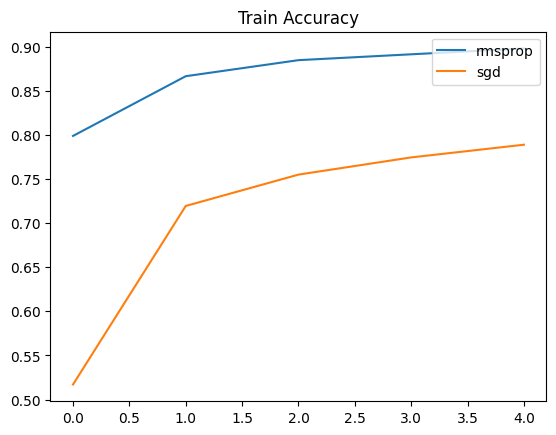

In [4]:
for i in range(len(optimizers)):
    plt.plot(accuracy[i],label = optimizers[i])
plt.title("Train Accuracy")
plt.legend(loc='upper right')
plt.show()

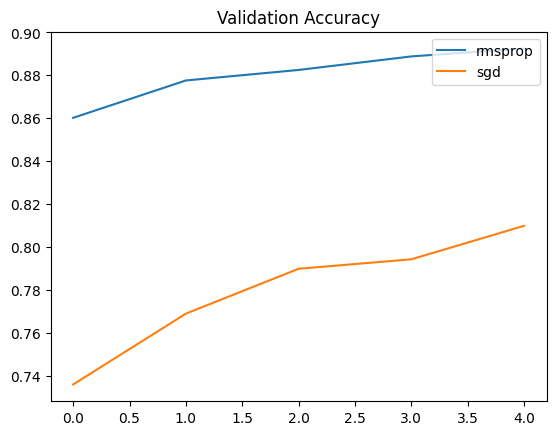

In [5]:
for i in range(len(optimizers)):
    plt.plot(validation[i],label = optimizers[i])
plt.title("Validation Accuracy")
plt.legend(loc='upper right')
plt.show()

# Predict Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Trouser


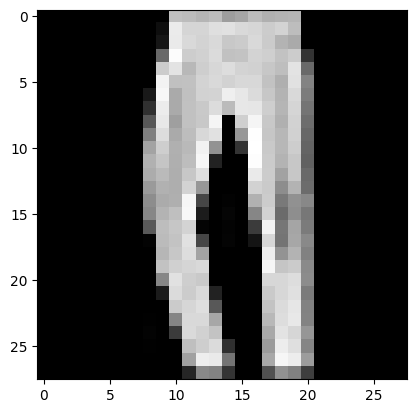

In [6]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def predict_image(model, img):
    img = np.reshape(img,(1,28,28))
    pred = model.predict(img)
    ans = np.argmax(pred)
    print(labels[ans])

m = load_model('fasion_rmsprop_model.keras')
predict_image(m, x_test[5])
plt.imshow(x_test[5],cmap='gray')
